In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns1 = []
ns1d = []

f = open("../../../../../../Data/Proteins/DENV2/NS1/DENV2_NS1.txt", "r")
for x in f:
    if "DSS" in x:
        ns1d.append(1)
    elif "DHF" in x:
        ns1d.append(1)
    elif x[0] == ">":
        ns1d.append(0)
    else:
        x = x.replace("\n", "")
        ns1.append(x)

In [3]:
# Converting the arrays into DataFrames
ns1 = pd.DataFrame(ns1)

# Attaching the "Disease" label column to the input
ns1["Disease"] = ns1d

# Renaming the columns
ns1 = ns1.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
# Concatinating the input data into one DataFrame
print("The combined shape of the given data is:", str(ns1.shape))
print("The length of the combined data is:", str(len(ns1.index)))
print("Does the combined data have any null value? ->", ns1.isnull().values.any())

# Shuffling the data and then taking a peek
ns1 = ns1.sample(frac = 1)
print(ns1.head())

The combined shape of the given data is: (603, 2)
The length of the combined data is: 603
Does the combined data have any null value? -> False
                                              Sequence  Disease
25   DSGCVVSWKNKELKCGSGIFITDNVHTWTEQYKFQPESPSKLASAI...        0
2    DSGCVVSWKNKELKCGSGIFITDNVHTWTEQYKFQPESPSKLASAI...        0
464  DSGCVVSWKNKELKCGSGIFITDNVHTWTEQYKFQPESPSKLASAI...        1
252  DSGCVVSWKNKELKCGSGIFITDNVHTWTEQYKFQPESPSKLASAI...        0
10   DSGCVVSWKNKELKCGSGIFITDDVHTWTEQYKFQPESPSKLASAI...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

ns1['words'] = ns1.apply(lambda x: getKmers(x['Sequence']), axis=1)
ns1 = ns1.drop('Sequence', axis=1)

ns1_texts = list(ns1['words'])
for item in range(len(ns1_texts)):
    ns1_texts[item] = ' '.join(ns1_texts[item])

In [6]:
# Creating y and printing the shape of it
y = ns1.iloc[:, 0].values
print("The shape of y is:", y.shape)

The shape of y is: (603,)


In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(ns1_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (603, 1559)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_scores = []

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.7194095582106141
The score for number of neighbours = 2 is: 0.7144905992405298
The score for number of neighbours = 3 is: 0.7228785773826063
The score for number of neighbours = 4 is: 0.7212674817078818
The score for number of neighbours = 5 is: 0.7280726127628044
The score for number of neighbours = 6 is: 0.7363531536537927
The score for number of neighbours = 7 is: 0.7214341946837084
The score for number of neighbours = 8 is: 0.741410577012133
The score for number of neighbours = 9 is: 0.7363795498749652
The score for number of neighbours = 10 is: 0.7262684078910808
The score for number of neighbours = 11 is: 0.7312966564786514
The score for number of neighbours = 12 is: 0.7114040937297397
The score for number of neighbours = 13 is: 0.7197684542002408
The score for number of neighbours = 14 is: 0.7131819023802908
The score for number of neighbours = 15 is: 0.7164068722793369
The score for number of neighbours = 16 is: 0.7181291099379458
Th

Length of list 29
Max of list 0.7445762711864407


Text(0, 0.5, 'Cross-validated accuracy')

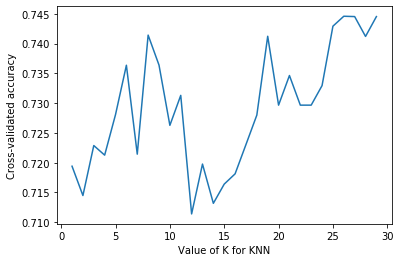

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')